In [56]:

from sklearn import metrics
import pandas as pd
data = pd.read_csv('E:\databag\KMeans聚类(4到7)结果.csv')
data


data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data4


,Unnamed: 0,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,0,0.0,0.534884,0.830416,0.292517,0.066638,0.067114,0.04,0.159420,0.147541,...,0.847328,0.214286,0.222962,0.230303,0.072423,0.234146,0.105263,0.250000,0.623457,0.316667
1,1,0.0,0.395349,0.874179,0.272109,0.071632,0.010640,0.62,0.217391,0.163934,...,0.717557,0.178571,0.236273,0.157576,0.318106,0.492683,0.263158,0.457143,0.623457,0.450000
2,2,0.0,0.534884,0.830416,0.346939,0.020691,0.009003,0.50,0.159420,0.122951,...,0.687023,0.150000,0.242928,0.333333,0.355989,0.429268,0.210526,0.660714,0.709877,0.433333
3,3,0.0,0.348837,0.868709,0.319728,0.049658,0.015960,0.78,0.123188,0.090164,...,0.358779,0.121429,0.249584,0.048485,0.971588,0.370732,0.157895,0.425000,0.580247,0.433333
4,4,0.0,0.511628,0.874179,0.333333,0.058219,0.060566,0.38,0.224638,0.245902,...,0.465649,0.107143,0.237937,0.545455,0.498050,0.420000,0.263158,0.700000,0.641975,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,4046,1.0,0.372093,0.874179,0.394558,0.018265,0.034416,0.50,0.434783,0.516393,...,0.786260,0.264286,0.222962,0.430303,0.501393,0.204878,0.157895,0.564286,0.734568,0.666667
4047,4047,0.0,0.209302,0.824945,0.401361,0.012557,0.013259,0.30,0.021739,0.065574,...,0.786260,0.400000,0.249584,0.363636,0.320334,0.336585,0.052632,0.482143,0.549383,0.750000
4048,4048,0.0,0.441860,0.830416,0.387755,0.041096,0.013464,0.18,0.528986,0.450820,...,0.618321,0.721429,0.470882,0.363636,0.211699,0.482927,0.526316,0.764286,0.623457,0.566667
4049,4049,0.0,0.186047,0.808534,0.272109,0.023973,0.035808,0.28,0.239130,0.237705,...,0.755725,0.428571,0.234609,0.345455,0.281337,0.351707,0.210526,0.810714,0.438272,0.250000


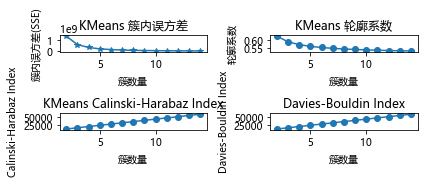

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

#存放设置不同簇数时的SSE值
sse_list = []
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(2, 15):
    model = KMeans(n_clusters=i)
    model.fit(data4)
    # kmeans算法inertia属性获取簇内的SSE
    sse_list.append(model.inertia_)
    # 轮廓系数
    silhouette = metrics.silhouette_score(data, model.labels_, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,model.labels_ ))
        
    
    

#Calinski-Harabaz Index，值越大说明聚类结果越好
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
for i in range(2,15):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(data4)
    score = calinski_harabasz_score(data4,kmeans.labels_)
    scores.append(score)
    
    #print('数据聚为%d类时calinski_harabaz指数为：%f'%(i,score))
    
# 绘制簇内误方差曲线
plt.subplot(421)
plt.title('KMeans 簇内误方差')
plt.plot(range(2, 15), sse_list, marker='*')
plt.xlabel('簇数量')
plt.ylabel('簇内误方差(SSE)')
# 绘制轮廓系数曲线
plt.subplot(422)
plt.title('KMeans 轮廓系数')
plt.plot(range(2, 15), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(423)
plt.title('KMeans Calinski-Harabaz Index')
plt.plot(range(2, 15),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(424)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 15),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')


plt.tight_layout()
plt.show()
